In [153]:
import numpy as np
import scipy as sc
from scipy import stats as sts
import math
from matplotlib import pyplot as plt

# Распределение Максвелла
Ссылка: https://en.wikipedia.org/wiki/Maxwell%E2%80%93Boltzmann_distribution



## Функция распределения вероятноясти:
$$ f(x) = \sqrt{\frac{2} {\pi}}x^2e^{\frac{-x^2}{2}} $$

Возьмем выборку случайных значений для данной функции, а также посчитаем теоретические средние и дисперсию для функции, чтобы потом просто делить дисперсию на количество выборкии и брать корень из функции, чтобы подставить в качестве аргументов для нормального распределения

In [348]:
mw = sts.maxwell()
sample = mw.rvs(1000)
x = np.linspace(0,5,1000)
pdf = mw.pdf(x)

theoMean = 2*np.sqrt(2/math.pi)
theoDisp = (3*np.pi-8)/np.pi

Text(0.5, 0, '$x$')

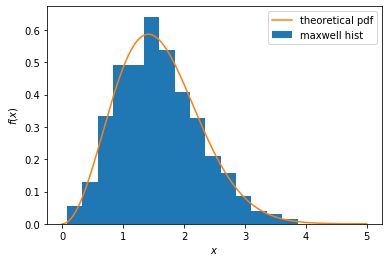

In [349]:
n, bins, patches = plt.hist(sample, 15, density=True, label='maxwell hist')
plt.plot(x, pdf, label='theoretical pdf', alpha=1)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Далее будем брать выборки из уже созданного массива значений функции по 5, 10, 50 и считать из них выборочное среднее: суммировать и делить на количество. Повторим операции по 1000 итераций, после чего составим гистограмму распределения и также сделаем для данного случая теоретическое распределение по ЦПТ с параметрами theoMean и theoDisp(дисперсию делим на число элементов в выборке и для задания нормального распределения извлекаем корень)

### Для выборок размером в 5:

Text(0.5, 0, '$x$')

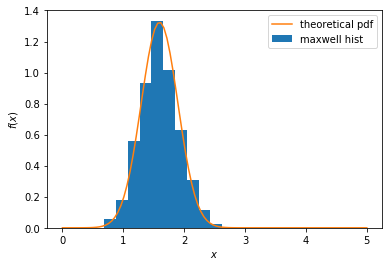

In [352]:
mean5 = []
limitdist = sts.norm(theoMean, np.sqrt((theoDisp)/5))
x = np.linspace(0,5,100)
pdf = limitdist.pdf(x)
for i in range(1000):
    mean5.append(sum([np.random.choice(sample) for i in range(5)])/5)
n, bins, patches = plt.hist(mean5, density=True, label='maxwell hist')
plt.plot(x, pdf, label='theoretical pdf')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')


### Для выборок размером в 10:

Text(0.5, 0, '$x$')

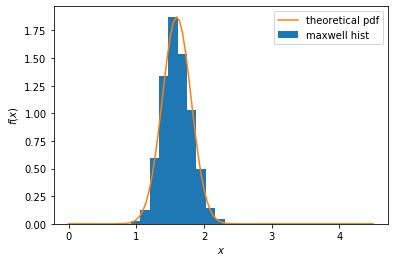

In [354]:
mean10 = []
limitdist = sts.norm(theoMean, np.sqrt((theoDisp)/10))
x = np.linspace(0,4.5,100)
pdf = limitdist.pdf(x)
for i in range(1000):
    mean10.append(sum([np.random.choice(sample) for i in range(10)])/10)
n, bins, patches = plt.hist(mean10, density=True, label='maxwell hist')
plt.plot(x, pdf, label='theoretical pdf')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

### И для выборки размером в 50:

Text(0.5, 0, '$x$')

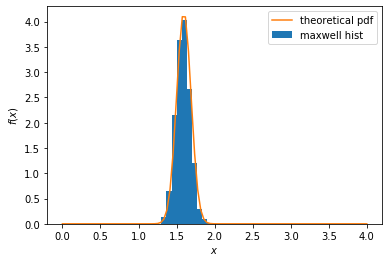

In [355]:
mean50 = []
limitdist = sts.norm(theoMean, np.sqrt((theoDisp)/50))
x = np.linspace(0,4,100)
pdf = limitdist.pdf(x)
for i in range(1000):
    mean50.append(sum([np.random.choice(sample) for i in range(50)])/50)
n, bins, patches = plt.hist(mean50, density=True, label='maxwell hist')
plt.plot(x, pdf, label='theoretical pdf')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Выводы при применении ЦПТ видно, что распределение выборочных средних стремится к нормальному с теоретическими параметрами. Также при увеличенни n видно большее приближении к нормальному распределению.